# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [23]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [24]:
# Inspect the shapes of the datasets
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


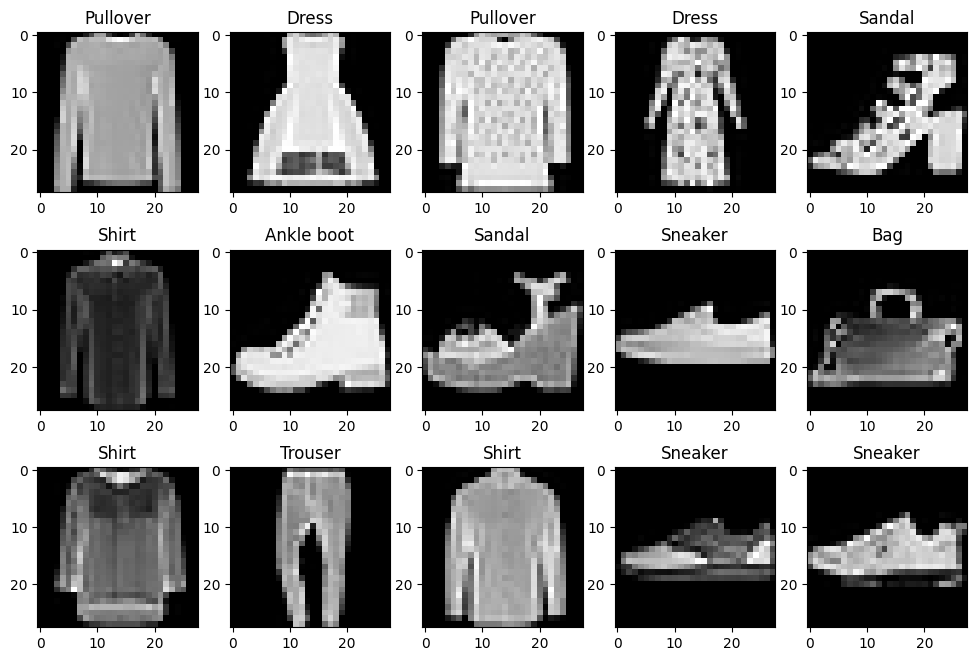


Pixel value statistics:
Min value: 0.0
Max value: 1.0
Mean value: 0.286
Std value: 0.353


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Verify the data looks as expected

fig, axes = plt.subplots(3, 5, figsize=(12, 8))
axes = axes.flatten()

for i in range(15):
    idx = np.random.randint(0, len(X_train))
    img = X_train[idx]
    label = y_train[idx]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"{class_names[label]}")

plt.show()

print("\nPixel value statistics:")
print(f"Min value: {X_train.min()}")
print(f"Max value: {X_train.max()}")
print(f"Mean value: {X_train.mean():.3f}")
print(f"Std value: {X_train.std():.3f}")

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

The data seems to be acceptable. However, the quality of images is quite low. The images seem pixellated even at such a low resolution.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images into a 784-dimensional vector
# You can use `model.add(<layer>)` to add layers to the model
model.add(Dense(10, input_shape=(784,)))  # Output layer with 10 classes
model.add(Dense(10, input_shape=(784,)))  # Output layer with 10 classes

model.summary()

# Compile the model using `model.compile()`
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with `model.fit()`
model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, validation_data=(X_test, y_test_onehot))

# Evaluate the model with `model.evaluate()`
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)

print(f"\tTest accuracy: {test_accuracy:.3f}")

c:\Users\Jay\Documents\Learning & Development\University of Toronto\Data Sciences Institute\Machine Learning\Deep Learning\deep_learning\deep-learning-env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Jay\Documents\Learning & Development\University of Toronto\Data Sciences Institute\Machine Learning\Deep Learning\deep_learning\deep-learning-env\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1502 - loss: 8.9023 - val_accuracy: 0.1479 - val_loss: 9.5936
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1474 - loss: 9.5108 - val_accuracy: 0.1486 - val_loss: 9.8449
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1480 - loss: 9.9234 - val_accuracy: 0.1507 - val_loss: 10.0786
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1489 - loss: 10.0094 - val_accuracy: 0.1490 - val_loss: 7.7449
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1465 - loss: 9.6687 - val_accuracy: 0.1466 - val_loss: 9.7708
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1447 - loss: 9.7751 - val_accuracy: 0.1466 - val_loss: 9.7708
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1447 - loss: 9.7751 - val_accuracy: 0.1466 - val_loss: 9.7708
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1447 - loss: 9.7751 

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

The performance of the baseline model is 15%. I had low expectations, but this performance is lower than expected. The performance is at this level probably because we have not used any activation layer.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten before fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

# Train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, validation_data=(X_test, y_test_onehot))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)

print(f"\tTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\tTest Loss: {test_loss:.4f}")

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8582 - loss: 0.3982 - val_accuracy: 0.8873 - val_loss: 0.3075
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9031 - loss: 0.2679 - val_accuracy: 0.8943 - val_loss: 0.2926
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9190 - loss: 0.2212 - val_accuracy: 0.9051 - val_loss: 0.2578
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9296 - loss: 0.1906 - val_accuracy: 0.9026 - val_loss: 0.2682
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9401 - loss: 0.1618 - val_accuracy: 0.9119 - val_loss: 0.2496
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9477 - loss: 0.1387 - val_accuracy: 0.9110 - val_loss: 0.2695
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9567 - loss: 0.1179 - val_accuracy: 0.9108 - val_loss: 0.2876
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9635 - loss: 0.0990 -

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

The CNN model peformed better than the baseline model. The performance increased from 15% to 91%, even with the same number of epochs. Using CNN contributed to this improvement, since the baseline is a simple linear model and does not have any activation layer.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

Testing with a 3 * 3 kernel

In [29]:
# A. Test Hyperparameters

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_accuracy = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"\tTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\tTest Loss: {test_loss:.4f}")
print(f"\tTotal Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10


c:\Users\Jay\Documents\Learning & Development\University of Toronto\Data Sciences Institute\Machine Learning\Deep Learning\deep_learning\deep-learning-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8285 - loss: 0.4933 - val_accuracy: 0.8552 - val_loss: 0.3958
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8855 - loss: 0.3248 - val_accuracy: 0.8898 - val_loss: 0.3126
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9002 - loss: 0.2783 - val_accuracy: 0.8938 - val_loss: 0.2994
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9110 - loss: 0.2487 - val_accuracy: 0.9028 - val_loss: 0.2769
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9197 - loss: 0.2216 - val_accuracy: 0.8994 - val_loss: 0.2858
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9284 - loss: 0.1985 - val_accuracy: 0.9069 - val_loss: 0.2603
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9328 - loss: 0.1854 - val_accuracy: 0.9057 - val_loss: 0.2684
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9400 - loss: 0.1657 - val_accuracy: 0.9094 - va

Testing with a 4 * 4 kernel

In [30]:
# A. Test Hyperparameters

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_accuracy = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"\tTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\tTest Loss: {test_loss:.4f}")
print(f"\tTotal Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8195 - loss: 0.5116 - val_accuracy: 0.8579 - val_loss: 0.3981
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8796 - loss: 0.3430 - val_accuracy: 0.8820 - val_loss: 0.3300
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8939 - loss: 0.2962 - val_accuracy: 0.8911 - val_loss: 0.3100
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9035 - loss: 0.2660 - val_accuracy: 0.8926 - val_loss: 0.3005
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9119 - loss: 0.2413 - val_accuracy: 0.8930 - val_loss: 0.2924
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9211 - loss: 0.2191 - val_accuracy: 0.8957 - val_loss: 0.2898
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9273 - loss: 0.2005 - val_accuracy: 0.9053 - val_loss: 0.2675
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9321 - loss: 0.1858 - val_accuracy: 0.

Testing with a 5 * 5 kernel

In [31]:
# A. Test Hyperparameters

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_accuracy = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"\tTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\tTest Loss: {test_loss:.4f}")
print(f"\tTotal Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8287 - loss: 0.4916 - val_accuracy: 0.8724 - val_loss: 0.3664
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8831 - loss: 0.3310 - val_accuracy: 0.8849 - val_loss: 0.3283
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8985 - loss: 0.2841 - val_accuracy: 0.8974 - val_loss: 0.2901
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9079 - loss: 0.2527 - val_accuracy: 0.9068 - val_loss: 0.2699
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9167 - loss: 0.2288 - val_accuracy: 0.9039 - val_loss: 0.2690
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9223 - loss: 0.2101 - val_accuracy: 0.9054 - val_loss: 0.2715
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9308 - loss: 0.1914 - val_accuracy: 0.9096 - val_loss: 0.2588
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9385 - loss: 0.1704 - val_accurac

Evaluation Based on Kernel Size

| Kernel Size | Accuracy (%) |
|-------------|--------------|
| 3 X 3       | 90.46%       |
| 4 X 4       | 90.41%       |
| 5 X 5       | 90.55%       |

Changing the kernel size varied the accuracy slightly. However, a 5 X 5 kernel size gave the best accuracy.

10% Dropout with 3 * 3 kernel

In [32]:
# B. Test presence or absence of regularization

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Dropout(0.1))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_accuracy = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"\tTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\tTest Loss: {test_loss:.4f}")
print(f"\tTotal Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8294 - loss: 0.4904 - val_accuracy: 0.8639 - val_loss: 0.3825
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8856 - loss: 0.3235 - val_accuracy: 0.8813 - val_loss: 0.3278
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9009 - loss: 0.2798 - val_accuracy: 0.8991 - val_loss: 0.2826
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9090 - loss: 0.2525 - val_accuracy: 0.8999 - val_loss: 0.2839
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9179 - loss: 0.2273 - val_accuracy: 0.9021 - val_loss: 0.2719
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9221 - loss: 0.2106 - val_accuracy: 0.9076 - val_loss: 0.2660
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9305 - loss: 0.1906 - val_accuracy: 0.9115 - val_loss: 0.2563
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9366 - loss: 0.1759 - val_accu

20% Dropout with 3 * 3 kernel

In [33]:
# B. Test presence or absence of regularization

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Dropout(0.2))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_accuracy = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"\tTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\tTest Loss: {test_loss:.4f}")
print(f"\tTotal Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8295 - loss: 0.4940 - val_accuracy: 0.8641 - val_loss: 0.3805
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8821 - loss: 0.3333 - val_accuracy: 0.8868 - val_loss: 0.3187
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8959 - loss: 0.2911 - val_accuracy: 0.8946 - val_loss: 0.2924
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9032 - loss: 0.2639 - val_accuracy: 0.9009 - val_loss: 0.2817
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9122 - loss: 0.2418 - val_accuracy: 0.8896 - val_loss: 0.3049
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9183 - loss: 0.2212 - val_accuracy: 0.9119 - val_loss: 0.2505
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9245 - loss: 0.2047 - val_accuracy: 0.9079 - val_loss: 0.2557
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9295 - loss: 0.1902 - val_accu

30% Dropout with 3 * 3 kernel

In [34]:
# B. Test presence or absence of regularization

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Dropout(0.3))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_accuracy = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"\tTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\tTest Loss: {test_loss:.4f}")
print(f"\tTotal Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8284 - loss: 0.4894 - val_accuracy: 0.8789 - val_loss: 0.3495
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8824 - loss: 0.3315 - val_accuracy: 0.8898 - val_loss: 0.3115
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8972 - loss: 0.2875 - val_accuracy: 0.8986 - val_loss: 0.2826
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9045 - loss: 0.2633 - val_accuracy: 0.8968 - val_loss: 0.2887
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9100 - loss: 0.2456 - val_accuracy: 0.9055 - val_loss: 0.2610
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9182 - loss: 0.2235 - val_accuracy: 0.9094 - val_loss: 0.2529
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9231 - loss: 0.2091 - val_accuracy: 0.8990 - val_loss: 0.2778
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9287 - loss: 0.1965 - val_accu

40% Dropout with 3 * 3 kernel

In [39]:
# B. Test presence or absence of regularization

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Dropout(0.4))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_accuracy = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"\tTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\tTest Loss: {test_loss:.4f}")
print(f"\tTotal Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8211 - loss: 0.5141 - val_accuracy: 0.8712 - val_loss: 0.3651
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8750 - loss: 0.3527 - val_accuracy: 0.8886 - val_loss: 0.3154
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8883 - loss: 0.3090 - val_accuracy: 0.8881 - val_loss: 0.3120
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8948 - loss: 0.2863 - val_accuracy: 0.8972 - val_loss: 0.2829
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9024 - loss: 0.2647 - val_accuracy: 0.8998 - val_loss: 0.2792
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9088 - loss: 0.2448 - val_accuracy: 0.9078 - val_loss: 0.2600
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9135 - loss: 0.2328 - val_accuracy: 0.9067 - val_loss: 0.2601
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9184 - loss: 0.2185 - val_accu

Evaluation Based on Dropout

| Dropout (%) | Accuracy (%) |
|-------------|--------------|
| 10          | 90.92        |
| 20          | 90.99        |
| 30          | 91.1         |
| 40          | 90.78        |

Increasing the dropout also increased the accuracy until 30% dropout, but dipped again at 40%. Hence, 30% dropout provides the best accuracy, amongst the values chosen.

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

I have tabulated above the performance with respect to both varying kernel size and dropout. Increasing the kernel size increased the accuracy, as did increasing the dropout, however, only to a limit; the accuracy started slightly reducing beyond this limit. The combination of a 5x5 kernel size and 30% dropout gives the best accuracy.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Dropout(0.3))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_accuracy = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"\tTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\tTest Loss: {test_loss:.4f}")
print(f"\tTotal Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8165 - loss: 0.5248 - val_accuracy: 0.8644 - val_loss: 0.3873
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8705 - loss: 0.3687 - val_accuracy: 0.8777 - val_loss: 0.3434
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8837 - loss: 0.3240 - val_accuracy: 0.8791 - val_loss: 0.3369
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8953 - loss: 0.2920 - val_accuracy: 0.8887 - val_loss: 0.3061
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9008 - loss: 0.2718 - val_accuracy: 0.8992 - val_loss: 0.2818
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9068 - loss: 0.2530 - val_accuracy: 0.9006 - val_loss: 0.2793
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9111 - loss: 0.2413 - val_accuracy: 0.9052 - val_loss: 0.2641
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9165 - loss: 0.2238 - val_accuracy:

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

The final model's performance is much better than the baseline version; however, the final model is similar in performance to the CNN version. The optimized kernel size and dropout rates contributed to a final model version. If I had more time, I would further vary the epoch size and hyper-parameters to seek an even more optimized set of parameters.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.